In [1]:
from tensorflow import keras
from board_labeler import dictClasses, dctInv



model = keras.models.load_model('models/secondmodel')


In [2]:
import cv2
from board_finder import imageResize, getBoardCoords

img = imageResize(cv2.imread("Board_Examples/medium2.png"), 0.5)

imgs = getBoardCoords(img)

In [3]:
import numpy as np

predictionClass = model.predict(np.array(imgs)) # ALWAYS USE NP.ARRAY AND GIVE IT AN ARRAY TO PREDICT

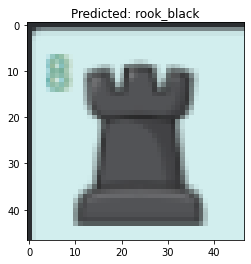

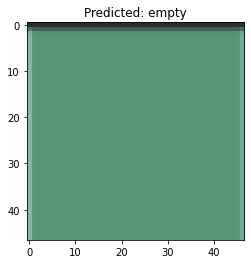

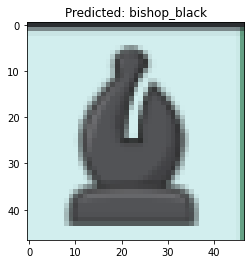

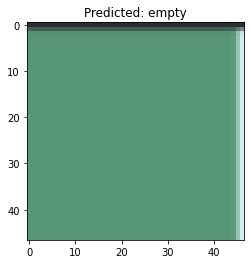

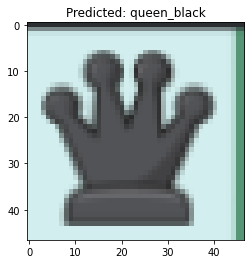

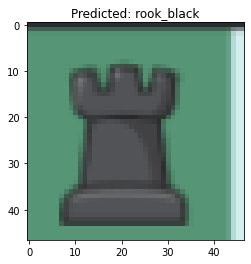

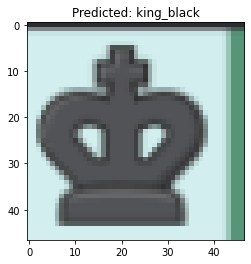

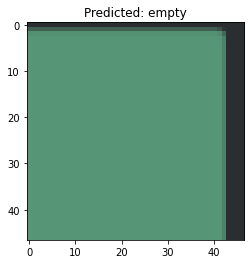

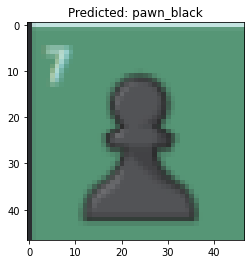

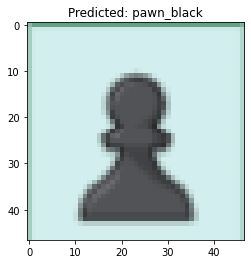

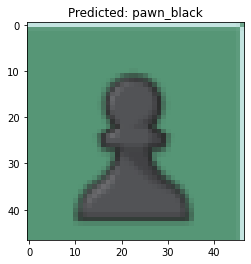

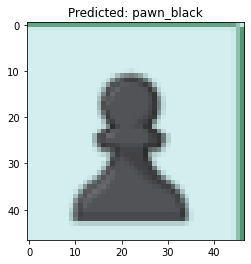

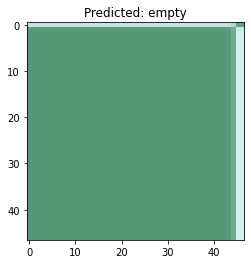

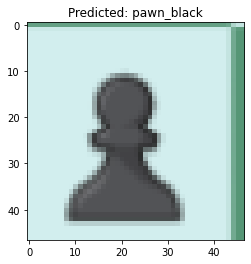

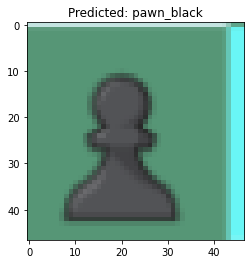

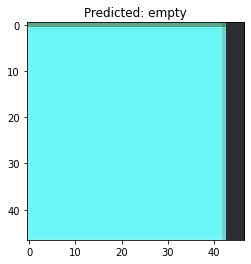

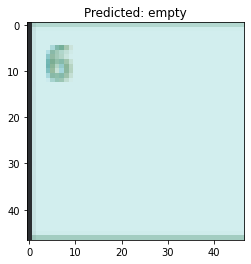

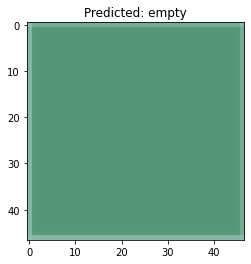

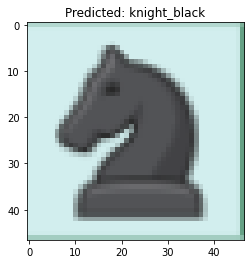

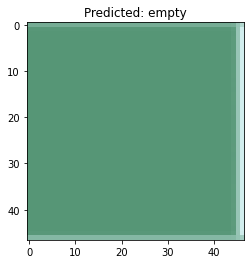

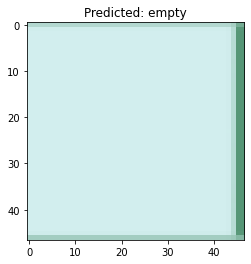

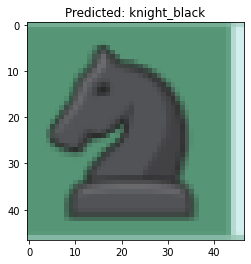

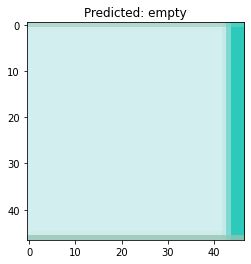

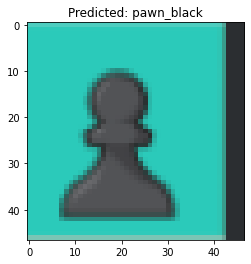

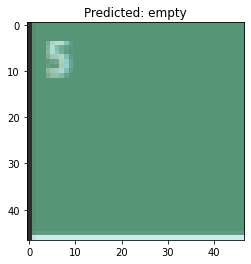

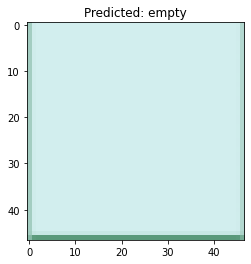

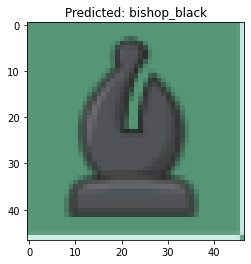

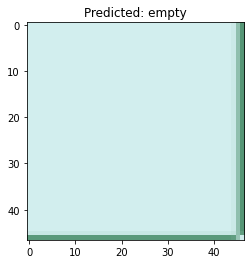

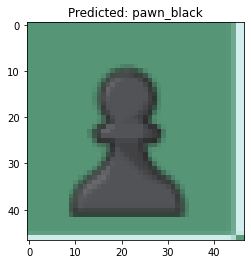

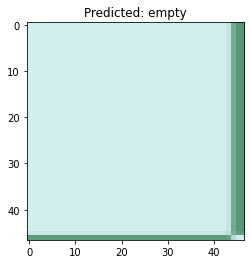

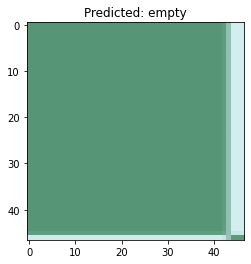

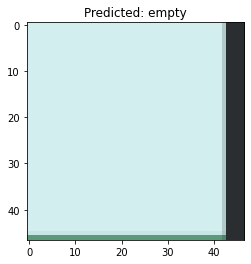

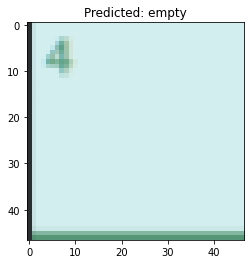

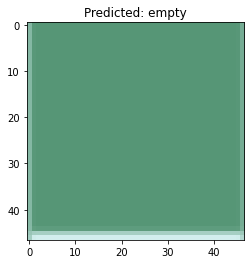

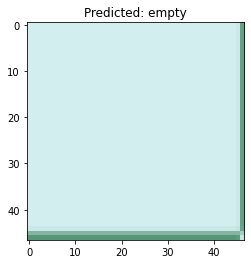

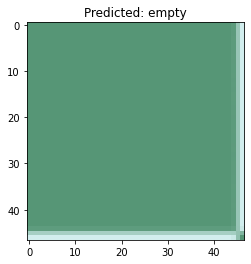

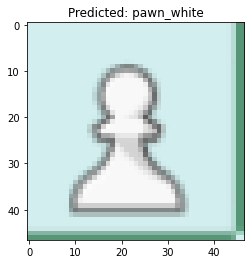

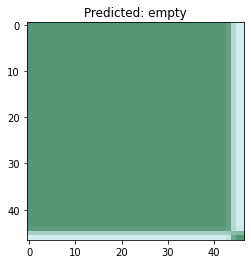

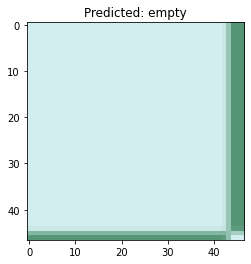

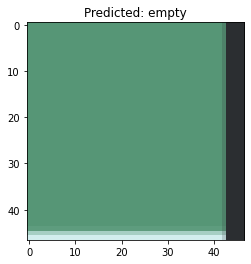

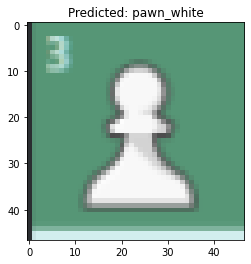

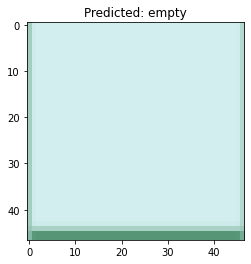

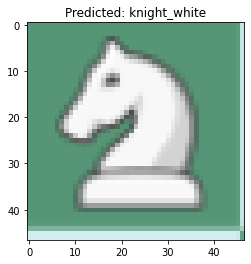

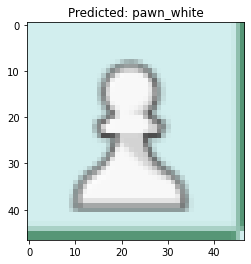

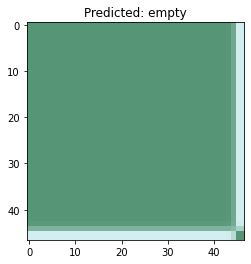

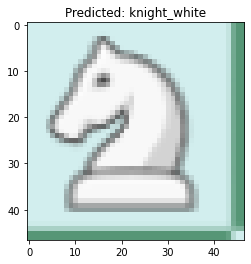

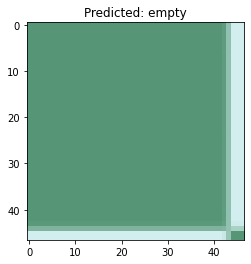

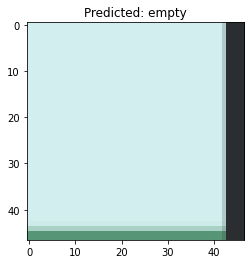

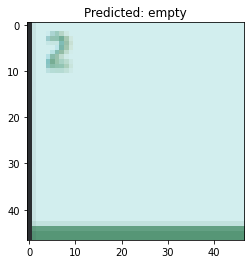

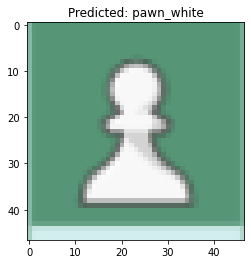

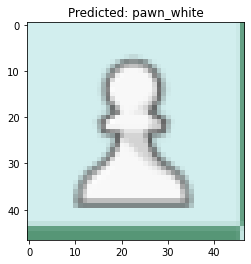

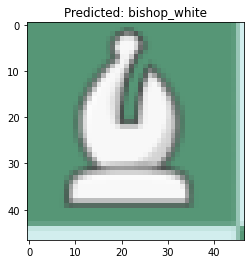

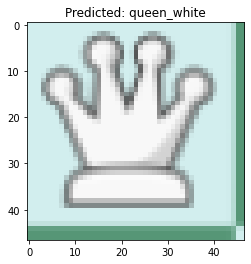

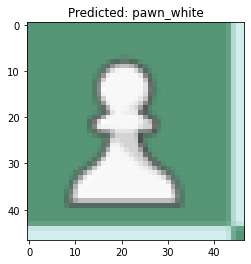

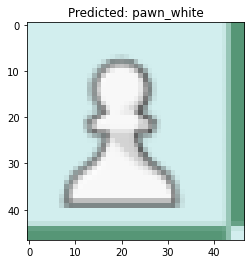

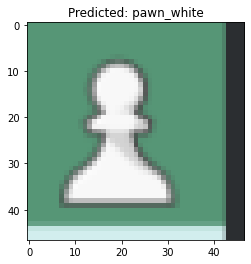

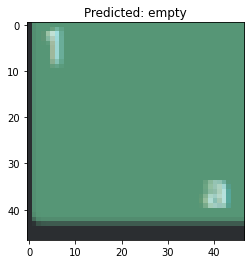

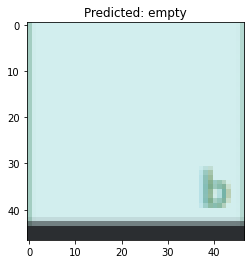

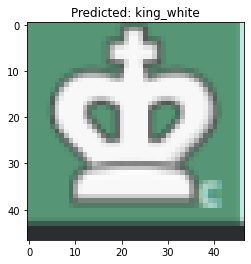

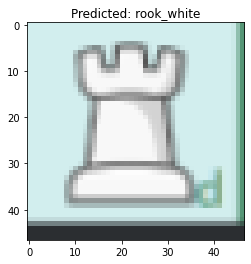

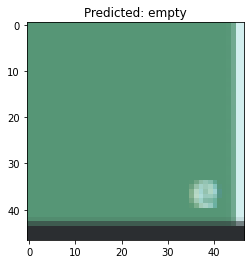

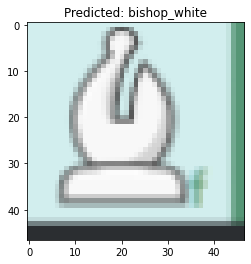

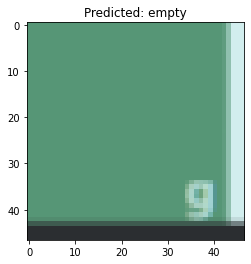

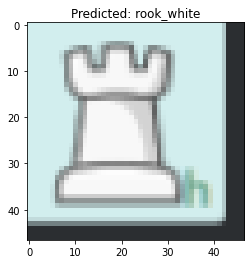

In [4]:
import matplotlib.pyplot as plt

for i,im in enumerate(imgs):
    imgplot = plt.imshow(im)
    classPredicted = dctInv[predictionClass[i].argmax()] # Get the class with the highest probability
    plt.title("Predicted: " + classPredicted)   
    
    plt.show()
    #print(classPredicted)